# Journal de bord

Copier-coller les cellules comme canevas pour y remplir les informations.

## 📅 Journal de bord – Jour 1 (09/07/2025)

### 🔧 Étapes / Actions réalisées
- Lecture du sujet d'examen
- Téléchargement des données
- Réflexion sur les données qui permettront d'entrainer le modèle (but précis de prédir si un vol aura plus de 15 min de retard à l'arrivée)

### 📝 Observations / Difficultés
- Le sujet à l'air intéressant. Il s'agit d'un exercice portant sur la classification comme nous avons pu en faire lors du brief 7
- La volumétrie du jeu de données parait importante

### ✅ Prochaines étapes
- Création d'un notebook pour exploration du jeu de données

## 📅 Journal de bord – Jour 2 (22/07/2025 matin)

### 🔧 Étapes / Actions réalisées
- Création du notebook et mise en place de l'environnement avec l'installation de différente librairie dans un projet
- Chargement des données dans le notebook (boucle sur les 12 CSV)
- Lecture approfondies des colonnes à disposition et séléction des colonnes qui seront utilisées dans l'entrainement du modèle.
- Description via des fonctions Python des données dans le notebook. Cette analyse me permet d'identifier des données en erreur et je les élimine. 

### 📝 Observations / Difficultés
- Les colonnes et les données sont nombreuses. Je me pose la question de conserver toutes les données ou non, certaines ne seront pas exploitées lors de l'entrainement du modèle.
- Je m'interroge sue le fait que la prédiction doit pouvoir être faite après le décollage de l'avion ou seulement avant son décollage. Je vais conserver les données de décollage car elles pourront être nécessaires dans le premier cas.

### ✅ Prochaines étapes
- Je vais réfléchir à la mise en place d'un base de données relationelle pour optimiser le stockage des données

## 📅 Journal de bord – Jour 2 (22/07/2025 après-midi)

### 🔧 Étapes / Actions réalisées
- Création d'une liste d'aéroport
- Création d'une liste de compagnie
- Insertion des données dans une base de données Postresql en locale

### 📝 Observations / Difficultés
- J'ai travailler la liste des aéroports et des compagnies en amont des filtres sur les données (donc sur les données CSV directement), j'ai donc du refaire un clean des données aéroports et compagnies. J'aurais pu éviter cela en travaillant sur les données déjà filtrées car je pense que les listes auraient été quand même exhaustives.

### ✅ Prochaines étapes
- Je mettre en forme les données via un préprocesseur
- Je vais devoir determiner les types de modèles pertinents

## 📅 Journal de bord – Jour 3 (23/07/2025)

### 🔧 Étapes / Actions réalisées
- Pré-processing
- Entrainement sur des modèles : 
  - CNN (Convolutional Neural Network)
  - Régression Logistique
  - Random Forest (arbre de décision)

### 📝 Observations / Difficultés
- J'ai décider de faire de la prédiction avant le décollage. Les informations que je trouve importante sont les aéroports, la compagnie et les horaires prévus de décollage/attérissage
- Malheuresement les résultats sont très mauvais. Les modèles ne prévoient que très peu de retard. On retrouve une Accuracy proche de 83% qui correspond au 83% de vol n'ayant pas de retard à l'arrivée

### ✅ Prochaines étapes
- Essayer d'optimiser les modèles

Before Departure
- Random Forest 

Default Accuracy: : 0.836413
Default LogLoss: : 0.445571
Default ErrorRate: : 0.163587

Confusion Table:
truth\prediction
        1     2
1  360468  1948
2   65511  5371
Total: 433298

- Régression Logistique

        precision       recall  f1-score        support
0.0     0.84    1.00    0.91    108745
1.0     0.00    0.00    0.00    21245

    accuracy                           0.84    129990


- CNN

Matrice de confusion (cf result_cnn.png). Les résultats sont très mauvais

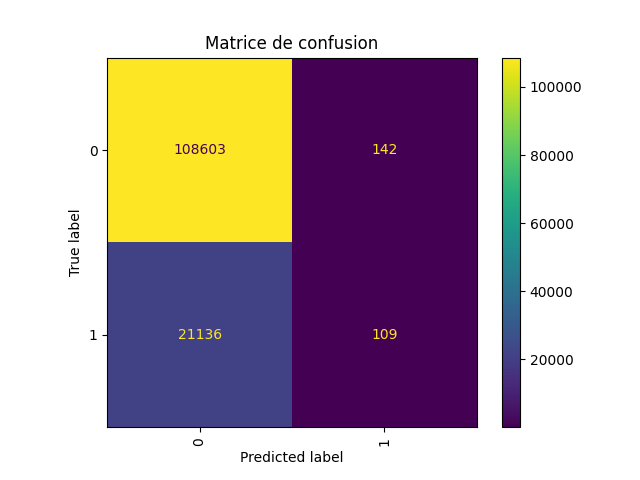

In [1]:
from IPython.display import Image, display

# Display an image (replace 'path/to/image.png' with your image file path)
display(Image(filename='result_cnn.png'))

## 📅 Journal de bord – Jour 4 (24/07/2025)

### 🔧 Étapes / Actions réalisées
- Optimisation des modèles
- Entrainement avec des données suite au décollage

### 📝 Observations / Difficultés
- Meme en modifiant les paramètres sur le modèles CNN les prédictions ne sont pas meilleurs
- J'ai décidé de faire de l'entrainement de modèle avec des données post décollage. 
  - Les informations importantes sont donc ici le retard au décollage et le temps de vol.
  - J'ai réussi à avoir de meilleurs prédicitons (cf result_cnn_afterDeparture.png pour le model CNN)

### ✅ Prochaines étapes
- 

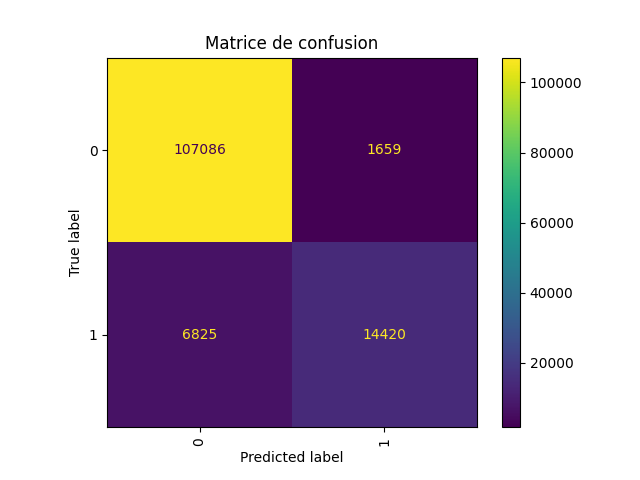

In [2]:
from IPython.display import Image, display

# Display an image (replace 'path/to/image.png' with your image file path)
display(Image(filename='result_cnn_afterDeparture.png'))

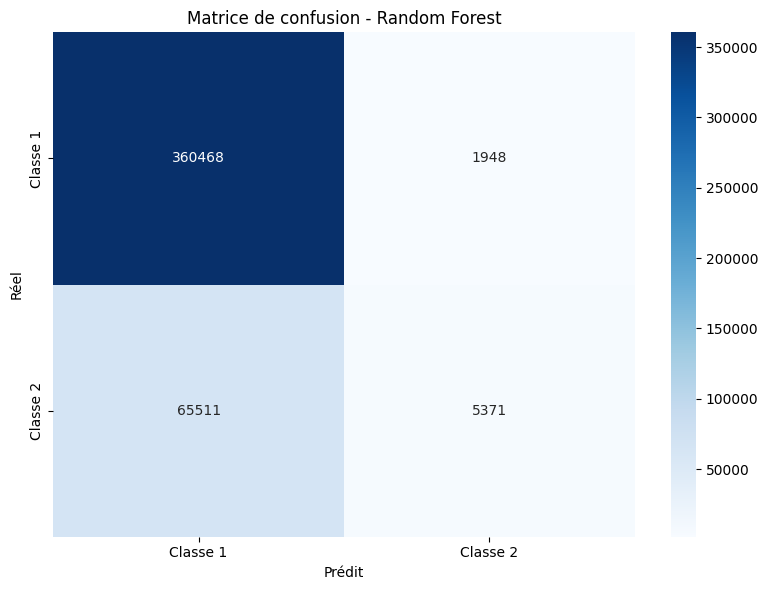

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matrice de confusion fournie
conf_matrix = np.array([[360468, 1948],
                        [65511, 5371]])

# Noms des classes
class_names = ['Classe 1', 'Classe 2']

# Création de la figure
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Ajout des labels
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Random Forest')
plt.tight_layout()

# Affichage
plt.show()